In [71]:
import math
import copy
!pip install numpy
import numpy as np

!pip install pillow
from PIL import Image, ImageColor
import IPython.display

from Piece import Piece
from Board import Board
from Engine import Engine, Game


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [72]:
class SimpleBot():
    #note - I think max_depth should always be an even number as if else score from heura will be a score of an opposite player
    #so the algorithm will be looking for the most plausible option for the enemy
    #which is the complete opposite of what it should do
    def __init__(self, alpha_beta = True):
        self.alpha_beta = alpha_beta
        if alpha_beta:
            self.max_depth = 4
        else:
            self.max_depth = 2
        
    def pawn_kill_first(self, board, y, x, path, al_done):
        p_kill_list = []
        def pawn_kill_latter(self, board, y, x, path, al_done):
            nonlocal p_kill_list


            cont = 0
            pathsave = path
            if board.isBlack(y - 1, x - 1):
                if (y - 1, x - 1) not in al_done:
                    if board.isEmpty(y - 2, x - 2):
                        cont = 1

                        pawn_kill_latter(self, board, y - 2, x - 2, path + [[y - 2, x - 2]], al_done + [(y - 1, x - 1)])
            path = pathsave

            if board.isBlack(y + 1, x + 1):
                if (y + 1, x + 1) not in al_done:
                    if board.isEmpty(y + 2, x + 2):
                        cont = 1

                        pawn_kill_latter(self, board, y + 2, x + 2, path + [[y + 2, x + 2]], al_done + [(y + 1, x + 1)])
            path = pathsave


            if board.isBlack(y - 1, x + 1):
                if (y - 1,x + 1) not in al_done:
                    if board.isEmpty(y - 2, x + 2):
                        cont = 1

                        pawn_kill_latter(self, board, y - 2, x + 2, path + [[y - 2, x + 2]], al_done + [(y - 1, x + 1)])
            path=pathsave

            if board.isBlack(y + 1, x - 1):
                if (y + 1, x - 1) not in al_done:
                    if board.isEmpty(y + 2, x - 2):
                        cont = 1

                        pawn_kill_latter(self, board, y + 2, x - 2, path + [[y + 2, x - 2]], al_done + [(y + 1, x - 1 )])
            path=pathsave

            if cont == 0:

                p_kill_list += [path]
            
#_____________________________________________________________________________________________________________________________________
#_____________________________________________________________________________________________________________________________________        
        
        cont = 0
        pathsave=path
        if board.isBlack(y + 1, x - 1):
            if (y + 1, x - 1) not in al_done:
                if board.isEmpty(y + 2, x - 2):

                    cont = 1

                    pawn_kill_latter(self, board, y + 2, x - 2, path + [[y + 2, x - 2]], al_done + [(y + 1, x - 1)])
        path = pathsave
        
        if board.isBlack(y + 1, x + 1):
            if (y + 1, x + 1) not in al_done:
                if board.isEmpty(y + 2, x + 2):

                    cont = 1

                    pawn_kill_latter(self, board, y + 2, x + 2, path + [[y + 2, x + 2]], al_done + [(y + 1, x + 1)])
        path = pathsave
        
        
                
        return p_kill_list
    
    
    

                

        
        

In [89]:
class SimpleBot(SimpleBot):
    def king_kill_first(self, board, y, x, path, al_done):
        k_kill_list = []
        def king_kill_latter(self, board, y, x, path, al_done):
            nonlocal k_kill_list
            cont = 0
            block = 0
            for i in range (min(x, y) + 1):
                if  not board.isEmpty(y - i - 1, x - i - 1):
                    if not board.isBlack(y - i - 1, x - i - 1):
                        block = i
                        break
                    
            for i in range (block):
                if board.isBlack(y - i - 1, x - i - 1):
                        if (y - i - 1, x - i - 1) not in al_done:
                            for j in range (i + 1 , block):
                                if board.isBlack(y - j - 1, x - j - 1) and (y - j - 1, x - j - 1) not in al_done:
                                    break

                                cont = 1
                                king_kill_latter(self, board, y - j - 1, x - j - 1, path + [[y - j - 1, x - j - 1]], al_done + [(y - i - 1, x - i - 1)])
                            break



            for i in range (9 - max(x, y) + 1):
                if not board.isEmpty(y + i + 1, x + i + 1):
                    if not board.isBlack(y + i + 1, x + i + 1):
                        block = i
                        break

            for i in range (block):
                if board.isBlack(y + i + 1, x + i + 1):
                    if (y + i + 1, x + i + 1) not in al_done:
                        for j in range (i + 1 , block):
                            if board.isBlack(y + j + 1, x + j + 1) and (y + j + 1, x + j + 1) not in al_done:
                                break

                            cont = 1
                            king_kill_latter(self, board, y + j + 1, x + j + 1, path + [[y + j + 1, x + j + 1]], al_done + [(y + i + 1, x + i + 1)])
                        break




            for i in range (min (x, 9 - y) + 1):
                if not board.isEmpty(y + i + 1, x - i - 1):
                    if not board.isBlack(y + i + 1, x - i - 1):
                        block = i
                        break

            for i in range (block):
                if board.isBlack(y + i + 1, x - i - 1):
                    if (y + i + 1, x - i - 1) not in al_done:
                        for j in range (i + 1 , block):
                            if board.isBlack(y + j + 1, x - j - 1) and (y + j + 1, x - j - 1) not in al_done:
                                break

                            cont = 1
                            king_kill_latter(self, board, y + j + 1, x - j - 1, path + [[y + j + 1, x - j - 1]], al_done + [(y + i + 1, x - i - 1)])
                        break        








            for i in range (min (y, 9 - x) + 1):
                if not board.isEmpty(y - i - 1, x + i + 1):
                    if not board.isBlack(y - i - 1, x + i + 1):
                        block = i
                        break

            for i in range (block):
                if board.isBlack(y - i - 1, x + i + 1):
                    if (y - i - 1, x + i + 1) not in al_done:
                        for j in range (i + 1 , block):
                            if board.isBlack(y - j - 1, x + j + 1) and (y - j - 1, x + j + 1) not in al_done:
                                break

                            cont = 1
                            king_kill_latter(self, board, y - j - 1, x + j + 1, path + [[y - j - 1, x + j + 1]], al_done + [(y - i - 1, x + i + 1)])
                        break

            if cont == 0:
                

                k_kill_list += [path]
                
                
#_____________________________________________________________________________________________________________________________________
#_____________________________________________________________________________________________________________________________________        
        

        cont = 0
        block = 0
        for i in range (min(x, y)  + 1):
            if  not board.isEmpty(y - i - 1, x - i - 1):
                if not board.isBlack(y - i - 1, x - i - 1):
                    block = i
                    break
                    
        for i in range (block):
            if board.isBlack(y - i - 1, x - i - 1):
                    if (y - i - 1, x - i - 1) not in al_done:
                        for j in range (i + 1 , block):
                            if board.isBlack(y - j - 1, x - j - 1) and (y - j - 1, x - j - 1) not in al_done:
                                break

                            cont = 1
                            king_kill_latter(self, board, y - j - 1, x - j - 1, path + [[y - j - 1, x - j - 1]], al_done + [(y - i - 1, x - i - 1)])
                        break
        
        
        
        for i in range (9 - max(x, y) + 1):
            if not board.isEmpty(y + i + 1, x + i + 1):
                if not board.isBlack(y + i + 1, x + i + 1):
                    block = i
                    break
                    
        for i in range (block):
            if board.isBlack(y + i + 1, x + i + 1):
                if (y + i + 1, x + i + 1) not in al_done:
                    for j in range (i + 1 , block):
                        if board.isBlack(y + j + 1, x + j + 1) and (y + j + 1, x + j + 1) not in al_done:
                            break

                        cont = 1
                        king_kill_latter(self, board, y + j + 1, x + j + 1, path + [[y + j + 1, x + j + 1]], al_done + [(y + i + 1, x + i + 1)])
                break
                
           
        
        
        
        for i in range (min (x, 9 - y) + 1):
            if not board.isEmpty(y + i + 1, x - i - 1):
                if not board.isBlack(y + i + 1, x - i - 1):
                    block = i
                    break
                    
        for i in range (block):
            if board.isBlack(y + i + 1, x - i - 1):
                if (y + i + 1, x - i - 1) not in al_done:
                    for j in range (i + 1 , block):
                        if board.isBlack(y + j + 1, x - j - 1) and (y + j + 1, x - j - 1) not in al_done:
                            break

                        cont = 1
                        king_kill_latter(self, board, y + j + 1, x - j - 1, path + [[y + j + 1, x - j - 1]], al_done + [(y + i + 1, x - i - 1)])
                    break        
        
        

        
        
        
        
        
        for i in range (min (y, 9 - x) + 1):
            if not board.isEmpty(y - i - 1, x + i + 1):
                if not board.isBlack(y - i - 1, x + i + 1):
                    block = i
                    break
                    
        for i in range (block):
            if board.isBlack(y - i - 1, x + i + 1):
                if (y - i - 1, x + i + 1) not in al_done:
                    for j in range (i + 1 , block):
                        
                        if board.isBlack(y - j - 1, x + j + 1) and (y - j - 1, x + j + 1) not in al_done:
                            break
                        print('x')
                        cont = 1
                        king_kill_latter(self, board, y - j - 1, x + j + 1, path + [[y - j - 1, x + j + 1]], al_done + [(y - i - 1, x + i + 1)])
                    break
        
        
        
        return k_kill_list

In [74]:
class SimpleBot(SimpleBot):
    def kill_list(self, board):
        k_list = []
        for white in board.whites:
            if not white.king:
                x = self.pawn_kill_first(board, white.y, white.x, [[white.y, white.x]], [])
                

                if x != []:
                    k_list += x
            else:
                x = self.king_kill_first(board, white.y, white.x, [[white.y, white.x]], [])                

                if x != []:
                    k_list += x
        k_listn = []

        for i in k_list:

            new_element = []
            for j in i:

                new_element += [{'y': j[0], 'x': j[1]}]

                

            k_listn.append(new_element)
            
        return k_listn

In [75]:
class SimpleBot(SimpleBot):
    def moves_list(self, board):
        moves=[]
        for white in board.whites:
            if not white.king:
                if board.isEmpty(white.y + 1, white.x + 1):
                    moves += [[white.y, white.x, white.y + 1, white.x + 1]]
                if board.isEmpty(white.y + 1, white.x - 1):
                    moves += [[white.y, white.x, white.y + 1, white.x - 1]]
            else:
                for i in range (min(white.x,white.y)):
                    if board.isEmpty(white.y - i - 1,white.x - i - 1):
                        moves += [[white.y, white.x, white.y - i - 1, white.x - 1 - i]]
                    else: break

                for i in range (9 - max(white.x, white.y)):
                    if board.isEmpty(white.y + i + 1,white.x + i + 1):
                        moves += [[white.y, white.x, white.y + i + 1, white.x + 1 + i]]
                    else: break

                for i in range (min(white.x, 9 - white.y)):
                    if board.isEmpty(white.y + i + 1,white.x - i - 1):
                        moves += [[white.y, white.x, white.y + i + 1, white.x - 1 - i]]
                    else: break

                for i in range (min(white.y, 9 - white.x)):
                    if board.isEmpty(white.y - i - 1,white.x + i + 1):
                        moves += [[white.y, white.x, white.y - i - 1, white.x + 1 + i]]
                    else: break
                        
                    
        movesn = []
        for i in moves:
            new_element = []
            for j in range (int(len(i) / 2)):
                new_element += [{'y': i[2*j], 'x': i[2*j + 1]}]
            movesn += [new_element]
        return movesn

In [76]:
class SimpleBot(SimpleBot):
    def heura(self, board):
        #idea: i should change how much material difference matters depending on the stage of the game
        #1 additional when you have 2 left wins you the game but when you have all of them it is not that big of a deal
        score = 0
        scoreb = 0
        def heura_inner(self, board):
            score = 0
            for white in board.whites:
                if white.king:
                    score += 5
                else:
                    score += 1
                if white.y == 3:
                    score += 0.25
                if white.y == 4:
                    score += 0.5
                if white.y == 5:
                    score += 0.75
                if white.y == 6:
                    score += 1.1
                if white.y == 7:
                    score += 1.6
                if white.y == 8:
                    score += 3
                for mate in board.whites:
                    for i in [-1, 1]:
                        if mate.y == white.y - 1 and mate.x == white.x + i:
                            score += 0.25
                if white.x == 0 or white.x == 9:
                    score += 0.25
            return score
                
        
        score = heura_inner(self, board) - heura_inner(self, board.revert())
        return score

In [81]:
#
#OLD VERSION WITH NO ALPHA-BETA
#

class SimpleBot(SimpleBot):
    def old_get_board_score(self, board, depth, my_move):


        if depth == self.max_depth:
            return (self.heura(board), None)
        else:
            if board.kill_possible():
                moves = self.kill_list(board)
                
                
            else:
                moves = self.moves_list(board)

        result = -10000 if my_move else 10000
        optmove = None
        for move in moves:   

            potential_result = self.old_get_board_score(board.make_move(move), depth + 1, not my_move)[0] #add result as argument
            #if potenial >(or <, depending on max/min) result gained from depth above, abort action and return that old result
            

            if (my_move == (potential_result > result)):
                result = potential_result
                optmove = move


        return (result, optmove)
    
#
#OLD VERSION WITH NO ALPHA-BETA
#

In [86]:
class SimpleBot(SimpleBot):
    def get_board_score(self, board, depth, my_move, old_result):


        if depth == self.max_depth:
            return (self.heura(board), None)
        else:
            if board.kill_possible():
                moves = self.kill_list(board)
                
                
            else:
                moves = self.moves_list(board)
        #print(moves)
        #print('______')
        result = -10000 if my_move else 10000
        optmove = None
        for move in moves:  
            print(move)
            potential_result = self.get_board_score(board.make_move(move), depth + 1, not my_move, result)[0]
            if (potential_result >= old_result and my_move == 1) or (potential_result <= old_result and my_move == 0):
                return (old_result, move)

            if (my_move == (potential_result > result)):
                result = potential_result
                optmove = move


        return (result, optmove)
    


In [87]:
class SimpleBot(SimpleBot):
    def make_move(self, board):
        if self.alpha_beta:
            return self.get_board_score(board, 0, True, 10000)[1]
        else:
            return self.old_get_board_score(board, 0, True)[1]


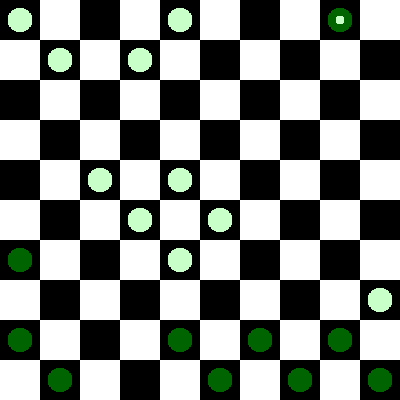

[{'y': 6, 'x': 4}, {'y': 7, 'x': 5}]
[{'y': 1, 'x': 5}, {'y': 3, 'x': 3}]
[{'y': 5, 'x': 5}, {'y': 7, 'x': 7}]
[{'y': 1, 'x': 3}, {'y': 3, 'x': 1}]
[{'y': 1, 'x': 1}, {'y': 3, 'x': 3}]
[{'y': 1, 'x': 3}, {'y': 3, 'x': 5}, {'y': 5, 'x': 3}]
[{'y': 5, 'x': 3}, {'y': 6, 'x': 4}]
x
x
x
[{'y': 9, 'x': 1}, {'y': 4, 'x': 6}, {'y': 2, 'x': 4}, {'y': 6, 'x': 8}]
[{'y': 9, 'x': 1}, {'y': 4, 'x': 6}, {'y': 2, 'x': 4}, {'y': 7, 'x': 9}, {'y': 9, 'x': 7}, {'y': 7, 'x': 5}]


ValueError: Can't change your direction here

In [90]:
bot = SimpleBot()
bot2 = SimpleBot(False)
game = Game(bot, bot2)
game.play_bots(True)

## 